# Advertisement project

We have to predict sales to generetegood revenue

# Importing Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load dataset

In [89]:
df=pd.read_csv("C:/Users/Lenovo/Desktop/dataset/project datatrained/advertisement.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


checking dimension and information about the dataset

In [90]:
df.shape

(200, 5)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [92]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

Checking null values in the dataset

In [93]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

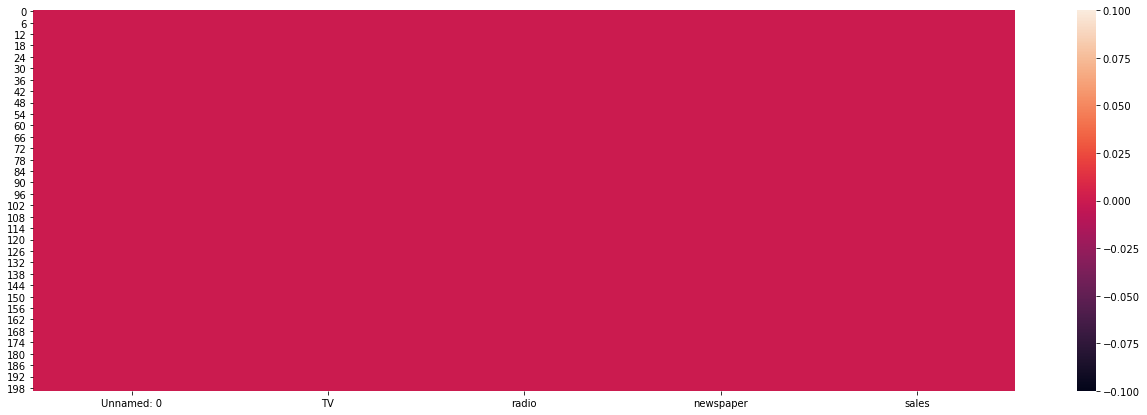

In [94]:
plt.figure(figsize=(22,7))
sns.heatmap(df.isnull())
plt.show()

There is no null values present in the dataset

In [95]:
df.describe()#statistical analysis

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [96]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

we donot need Unnamed:0 because its showing the index representation .so we remove it

In [97]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


divide independent and dependent variable as x,y respectively

In [98]:
x=df.drop('sales',axis=1)
y=df['sales']

Though all values of columns are continious we use scatterplot,boxplot for visualization to check if outlier present in the dataset or not.

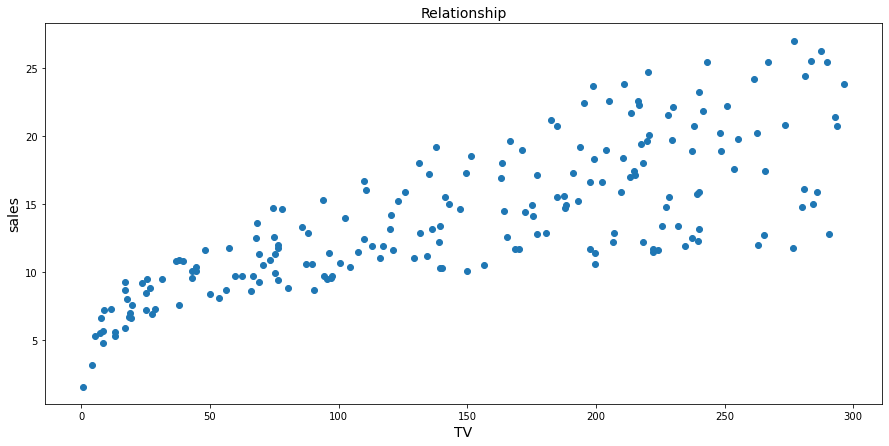

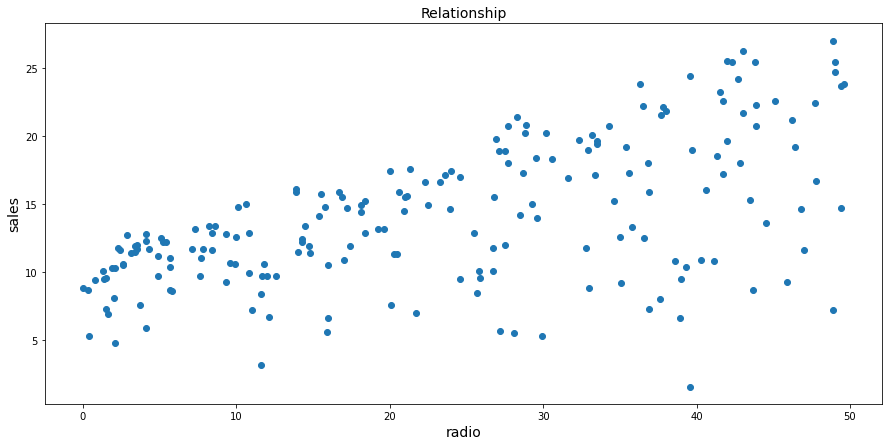

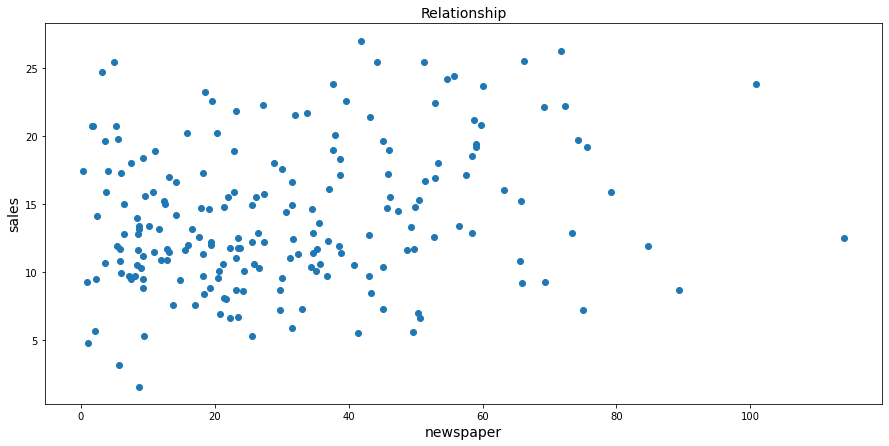

In [99]:
for i in x.columns:
    plt.figure(figsize=(15,7))
    plt.scatter(x=x[i],y=df['sales'])
    plt.xlabel(i,fontsize=14)
    plt.ylabel('sales',fontsize=14)
    plt.title('Relationship',fontsize=14)
    plt.show()

both for Tv and radio,our output variable sales is +ve relationship

In [100]:
#for i in x.columns:
#   x[i].plot.box()
#   plt.show()

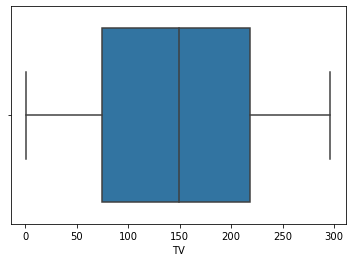

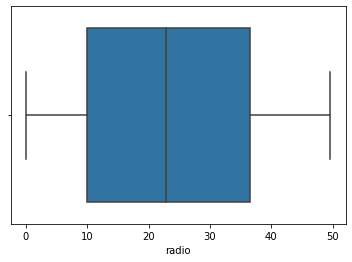

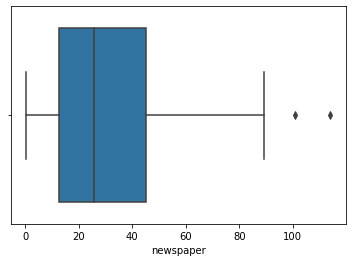

In [101]:
for i in x.columns:
    sns.boxplot(df[i])
    plt.show()

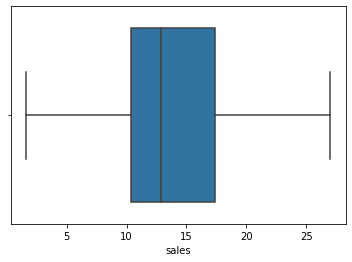

In [102]:
sns.boxplot(df['sales'])

from using above boxplot,we see that there are two outlier in newspaper column

checking outlier

In [103]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


finding 16 and 101 rows in the dataset

In [104]:
df.iloc[[16,101],:]

,TV,radio,newspaper,sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [105]:
df['newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

both are outlier because std is more .so we remove it 

In [106]:
df=df[(z<3).all(axis=1)]

In [107]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


now our dataset has 198 rows and 4 columns

checking skewness

In [108]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

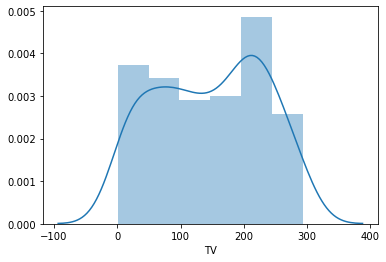

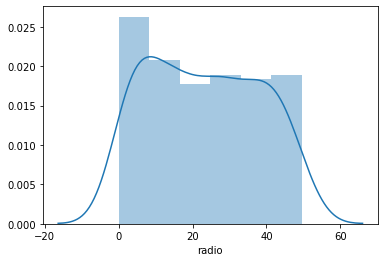

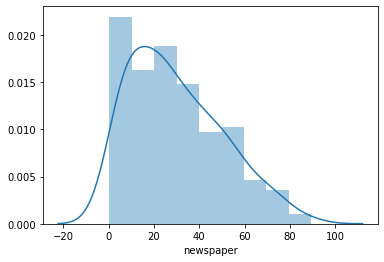

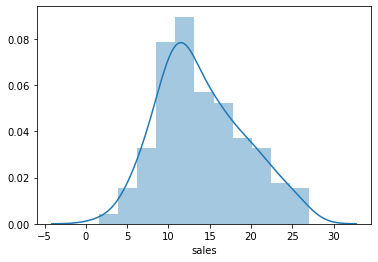

In [109]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

newspaper column has some skewness present.we remove it by using powertranfromation

In [110]:
from sklearn.preprocessing import power_transform
df['newspaper']=power_transform(df[['newspaper']])

In [111]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

skewness is removed from the dataset

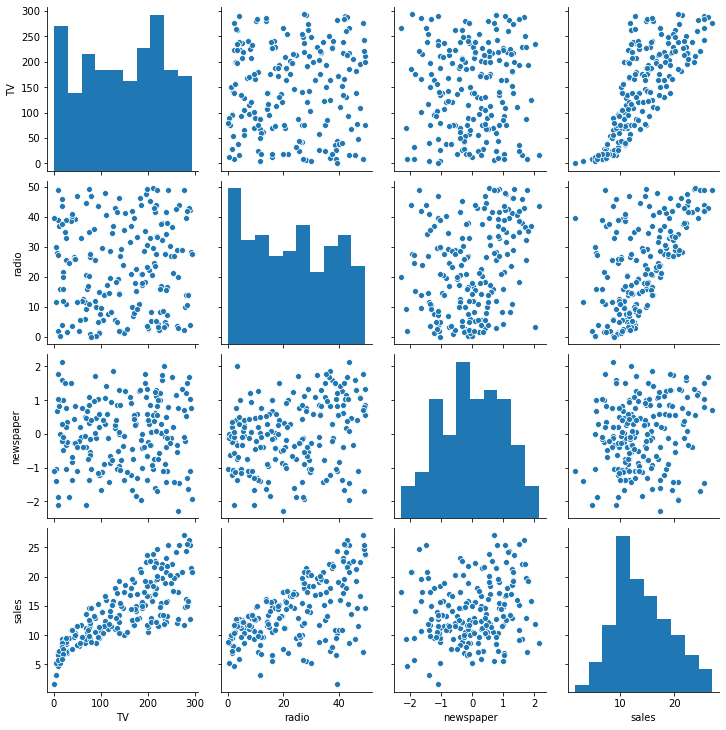

In [112]:
sns.pairplot(df)

divide x and y again as we remove its 2 rows

In [113]:
x=df.drop('sales',axis=1)
y=df['sales']

standardization of x

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

finding random_state

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [116]:
maxacc=0
maxrs=0
lr=LinearRegression()
for i  in range(1,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy score is',maxacc,'on random_state',maxrs)

best accuracy score is 0.9260692374470677 on random_state 11


so our random_state is 11

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [118]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.9260692374470677

In [119]:
import warnings
warnings.filterwarnings('ignore')

find  cv

In [120]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv=cross_val_score(lr,x_train,y_train,cv=j)
    print('accuracy',cv.mean(),'for cv=',j )

accuracy 0.8575047937536269 for cv= 2
accuracy 0.8724805920418562 for cv= 3
accuracy 0.8563974343372038 for cv= 4
accuracy 0.8627327105134736 for cv= 5
accuracy 0.843579519021065 for cv= 6
accuracy 0.8663332020719905 for cv= 7
accuracy 0.8576929625392398 for cv= 8
accuracy 0.8593794600128672 for cv= 9


cv=3

Text(0.5, 1.0, 'linear regression')

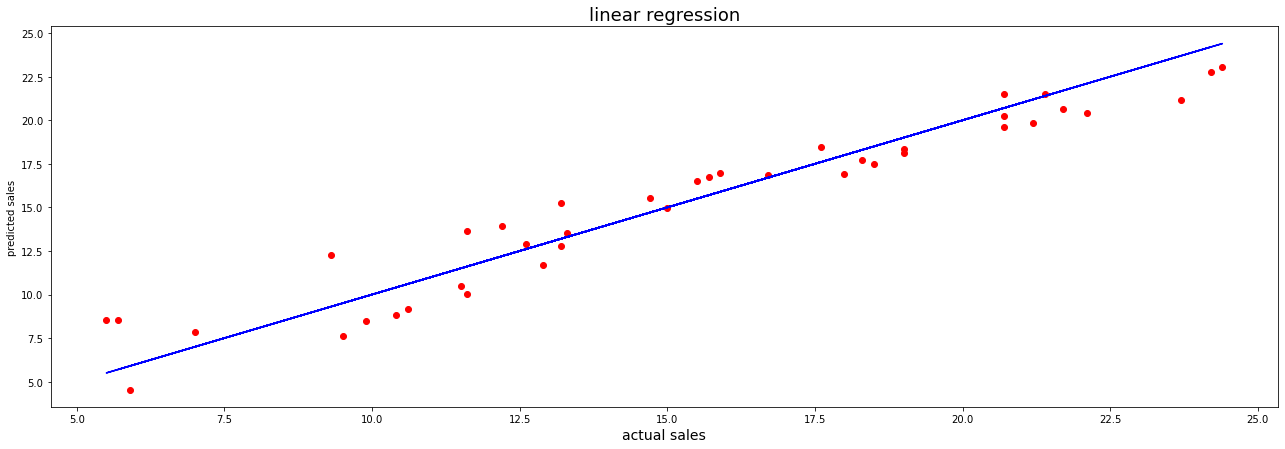

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual sales',fontsize=14)
plt.ylabel('predicted sales')
plt.title('linear regression',fontsize=18)

hyperparameter tuning

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [123]:
from sklearn.linear_model import Lasso
parameter={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8177660872513255

In [124]:
cvscore=cross_val_score(ls,x_train,y_train,cv=3)
cvscore.mean()

0.8009340584965857

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.9837159815013016

after tuning

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
gscv=GridSearchCV(rf,parameters,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

{'criterion': 'mse', 'max_features': 'auto'}

In [127]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.9853318539904837

In [128]:
rf_score=cross_val_score(rf,x,y,cv=3)
rf_score.mean()

0.9743689714458202

In [129]:
import pickle
filename='advert.pkl'
pickle.dump(rf,open(filename,'wb'))